# Неделя 3: оптимизация

## Задача 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [4]:
def lmap(function, vals):
    return list(map(function, vals))

In [7]:
from math import *
def f(x):
    return sin(x/5)*exp(x/10)+5*exp(-x/2)
f(2)

2.3150338432311584

In [8]:
import numpy as np
xs = np.arange(1,30.5,.5)
ys = lmap(f,xs)

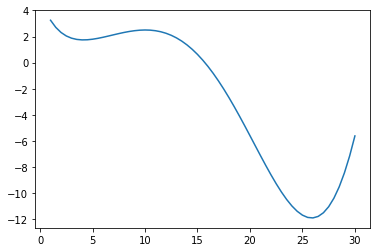

In [9]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.show()

Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

In [11]:
from scipy.optimize import minimize

Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [31]:
# local
x0 = 5
res = minimize(f, x0)
[res.x[0], res.fun]

[4.1362883226664824, 1.745268290331984]

In [32]:
# global
x1 = 25
res = minimize(f, x1)
[res.x[0], res.fun]

[25.880185915711404, -11.89889466596626]

In [33]:
res

      fun: -11.89889466596626
 hess_inv: array([[ 1.67418754]])
      jac: array([ -4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 25.88018592])

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [57]:
x_start1 = 2
res1 = minimize(f, x_start1, method = 'BFGS')
res1f = round(res1.fun,2)
res1f

1.75

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [58]:
x_start2 = 30
res2 = minimize(f, x_start2, method = 'BFGS')
res2f = round(res2.fun,2)
res2f

-11.9

Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

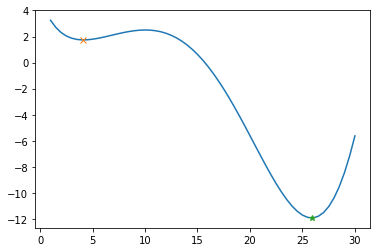

In [38]:
plt.plot(xs, ys, '-', res1.x[0], res1.fun, 'x', res2.x[0], res2.fun, '*')
plt.show()

In [59]:
rslt1 = [res1f, res2f]
out = open("w3_submission1.txt", "w")
out.writelines(str(el) + ' ' for el in rslt1)
out.close()

## Задача 2. Глобальная оптимизация

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

In [54]:
from scipy.optimize import differential_evolution

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [61]:
bounds = [(1,30)]
res_de = differential_evolution(f, bounds)
rslt2 = round(res_de.fun,2)
rslt2

-11.9

Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

In [62]:
out = open("w3_submission2.txt", "w")
out.writelines(str(rslt2))
out.close()

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [65]:
res2

      fun: -11.898894665981313
 hess_inv: array([[ 1.67936744]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019321])

In [64]:
res_de

     fun: -11.898894665981175
     jac: array([  5.32907052e-07])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([ 25.88019374])

In [66]:
[res2.nit, res_de.nit]

[6, 4]

## Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [68]:
def h(x):
    return int(f(x))

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

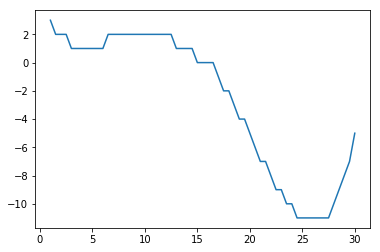

In [94]:
xs2 = np.arange(1,30.5,.5)
ys2 = lmap(h,xs2)
plt.plot(xs2,ys2)
plt.show()

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [90]:
x0_h = 30
res_h_bfgs = minimize(h, x0_h, method = 'BFGS')
res3_1 = res_h_bfgs.fun
res3_1

-5

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [91]:
bounds = [(1,30)]
res_h_de = differential_evolution(h, bounds)
res3_2 = res_h_de.fun
res3_2

-11.0

In [92]:
rslt3 = [res3_1, res3_2]
rslt3

[-5, -11.0]

In [93]:
out = open("w3_submission3.txt", "w")
out.writelines(str(el) + ' ' for el in rslt3)
out.close()

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

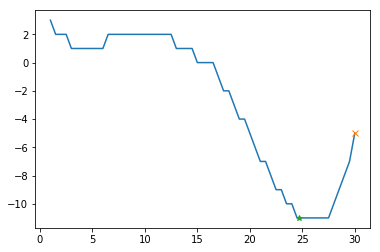

In [95]:
plt.plot(xs2, ys2, '-', res_h_bfgs.x[0], res_h_bfgs.fun, 'x', res_h_de.x[0], res_h_de.fun, '*')
plt.show()